In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings(action='ignore',category=RuntimeWarning)
import pandas as pd 
import numpy as np 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,LabelEncoder
import os
import seaborn as sn
import matplotlib.pyplot as plt 
import sys
import joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import tensorflow as tf
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.feature_selection import mutual_info_classif
from yellowbrick.model_selection import RFECV
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
import math
import datetime

# SVM Forest fires

# Data exploratory

In [3]:
df = pd.read_csv(r"F:\ExcelR Assingment\Csv Files\Support Vector Machines\forestfires.csv")

In [4]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
#checking shape of our data 
df.shape

(517, 31)

In [6]:
#checking info of our data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
#checking for any null values 
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
#checking with descriptive statistics 
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#checking for any duplicate data 
df[df.duplicated()].shape

(8, 31)

In [10]:
#locating our duplicate records
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool

In [12]:
#dropping our duplicate records 
df = df.drop_duplicates()
df.shape

(509, 31)

In [13]:
#assigning label encoder for our dependent variable size_category
df1 = df.copy()
label_encoder =  preprocessing.LabelEncoder()
df1['size_category'] = label_encoder.fit_transform(df1['size_category'])
df1.head()


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


# Visualizations

month


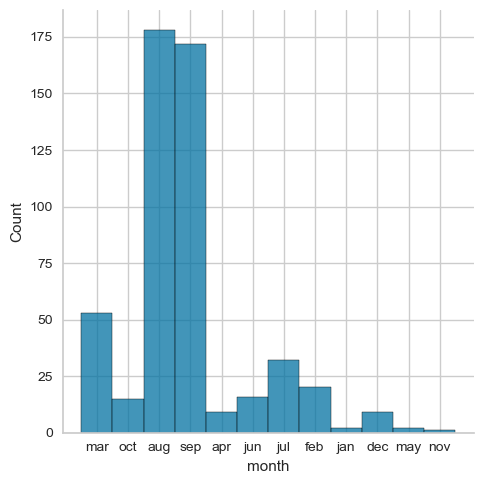

<Figure size 2000x1000 with 0 Axes>

day


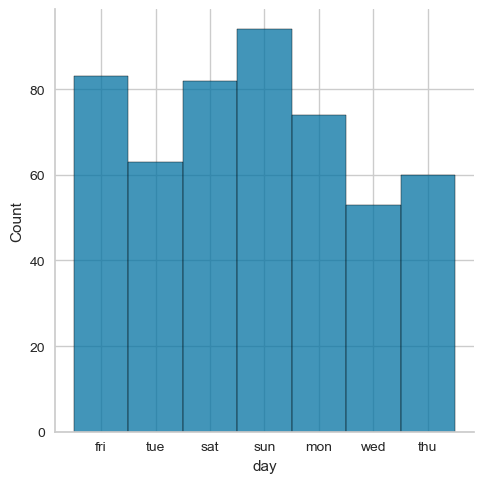

<Figure size 2000x1000 with 0 Axes>

FFMC


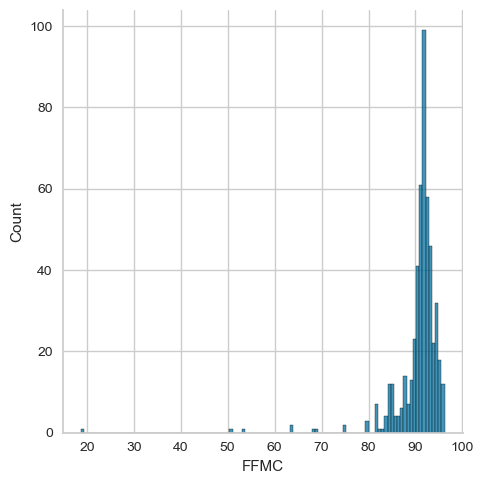

<Figure size 2000x1000 with 0 Axes>

DMC


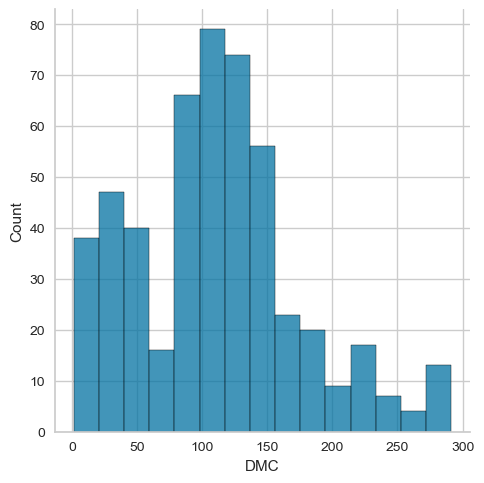

<Figure size 2000x1000 with 0 Axes>

DC


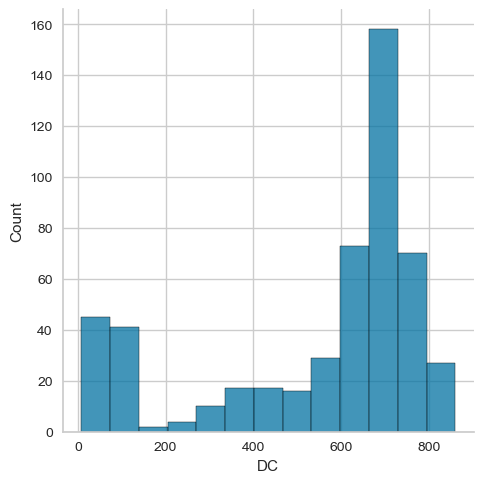

<Figure size 2000x1000 with 0 Axes>

ISI


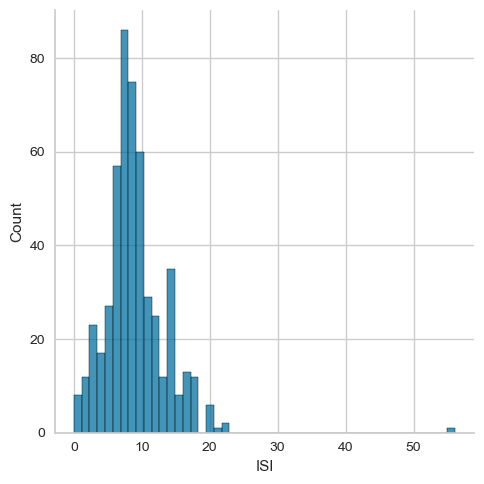

<Figure size 2000x1000 with 0 Axes>

temp


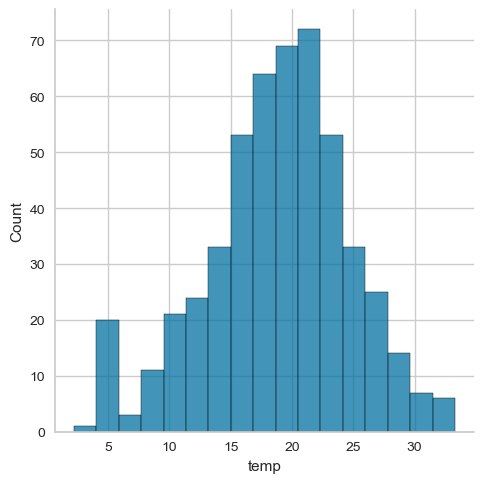

<Figure size 2000x1000 with 0 Axes>

RH


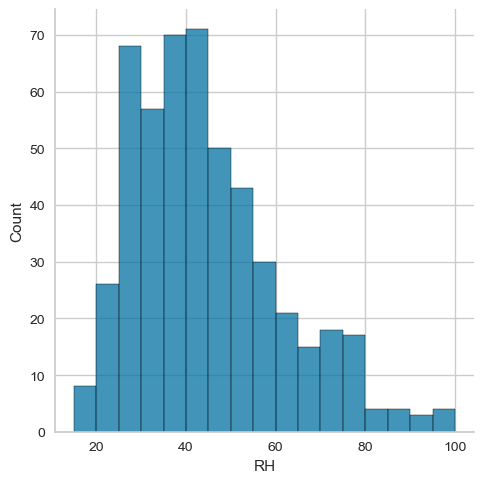

<Figure size 2000x1000 with 0 Axes>

wind


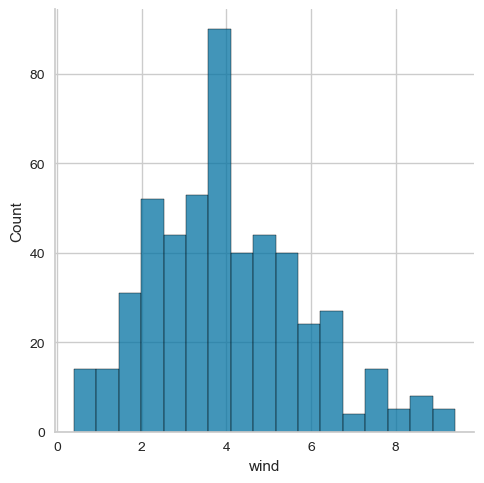

<Figure size 2000x1000 with 0 Axes>

rain


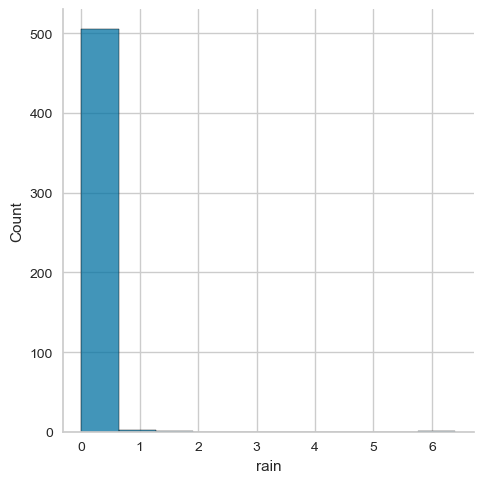

<Figure size 2000x1000 with 0 Axes>

area


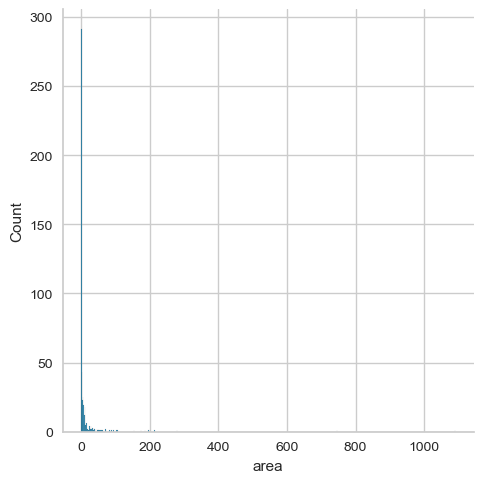

<Figure size 2000x1000 with 0 Axes>

dayfri


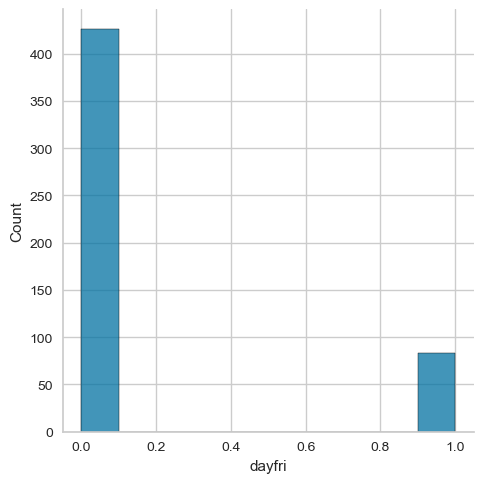

<Figure size 2000x1000 with 0 Axes>

daymon


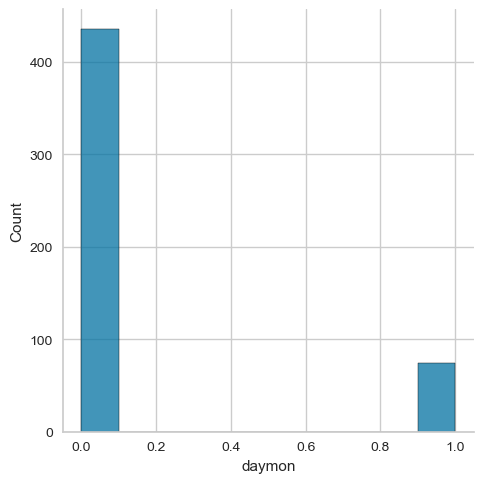

<Figure size 2000x1000 with 0 Axes>

daysat


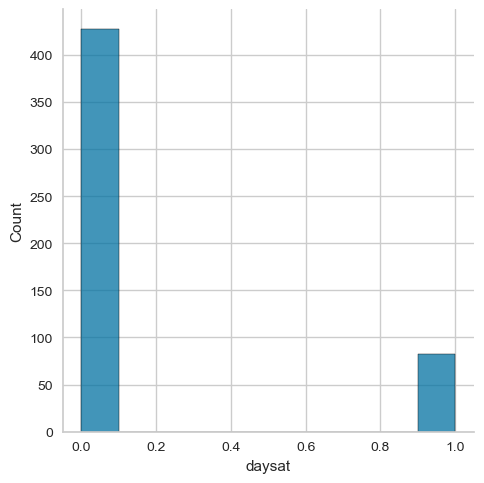

<Figure size 2000x1000 with 0 Axes>

daysun


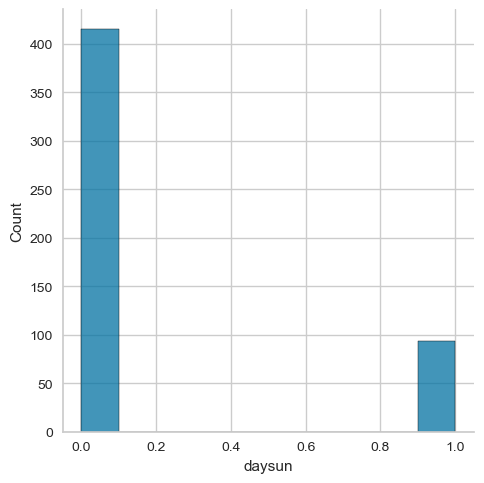

<Figure size 2000x1000 with 0 Axes>

daythu


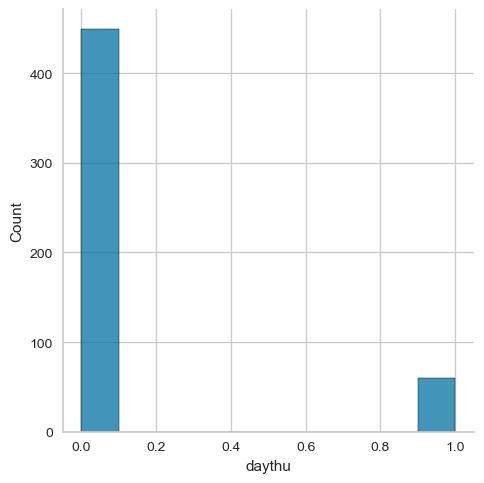

<Figure size 2000x1000 with 0 Axes>

daytue


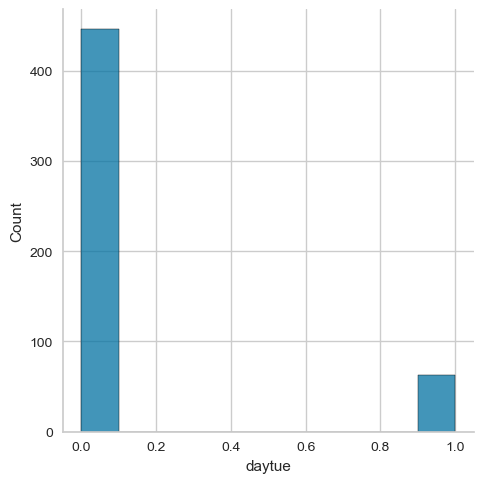

<Figure size 2000x1000 with 0 Axes>

daywed


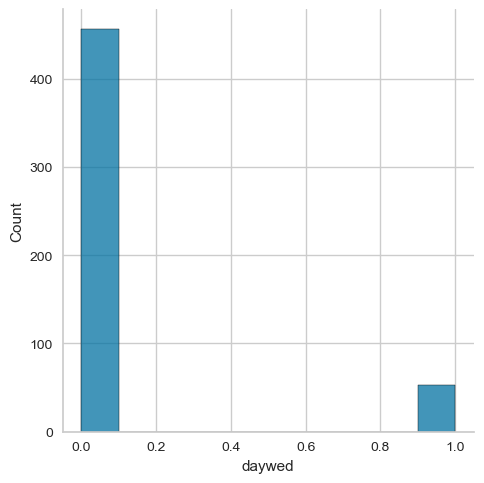

<Figure size 2000x1000 with 0 Axes>

monthapr


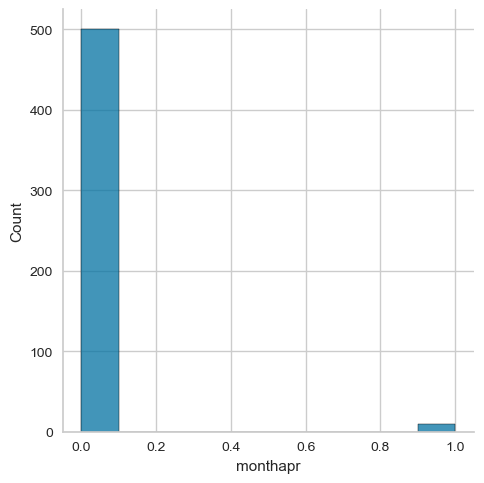

<Figure size 2000x1000 with 0 Axes>

monthaug


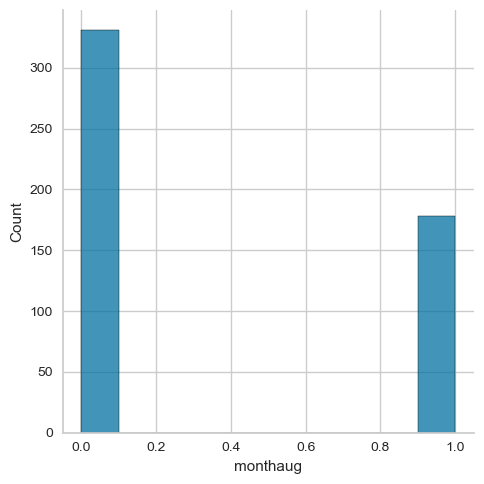

<Figure size 2000x1000 with 0 Axes>

monthdec


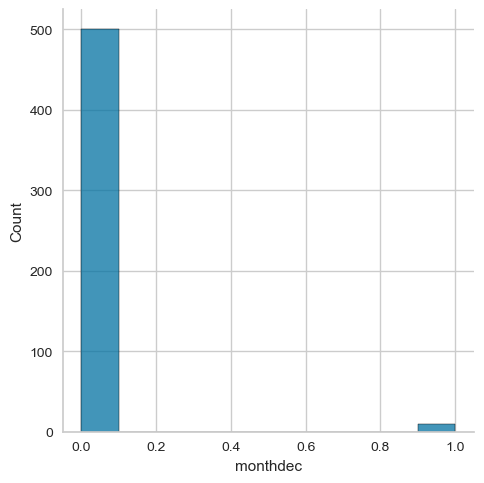

<Figure size 2000x1000 with 0 Axes>

monthfeb


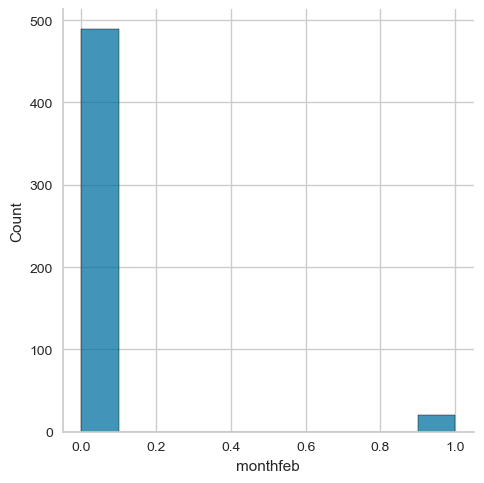

<Figure size 2000x1000 with 0 Axes>

monthjan


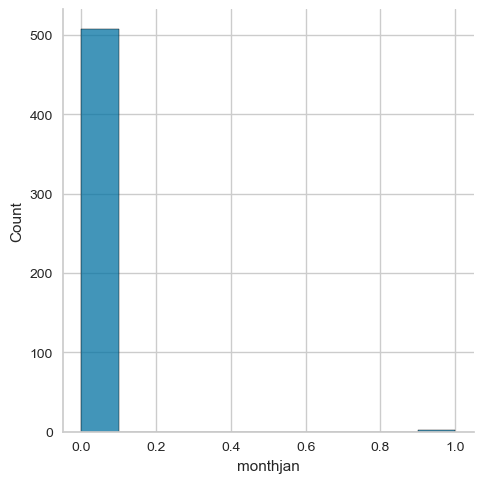

<Figure size 2000x1000 with 0 Axes>

monthjul


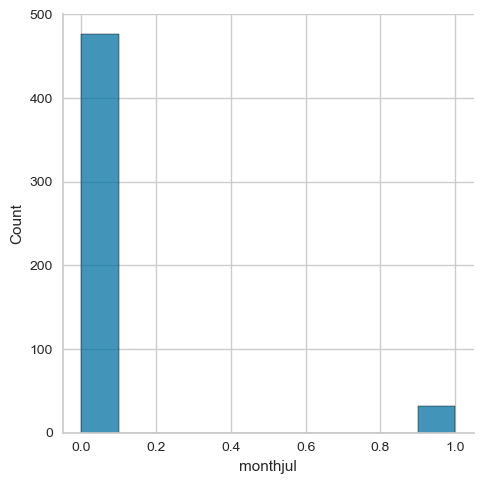

<Figure size 2000x1000 with 0 Axes>

monthjun


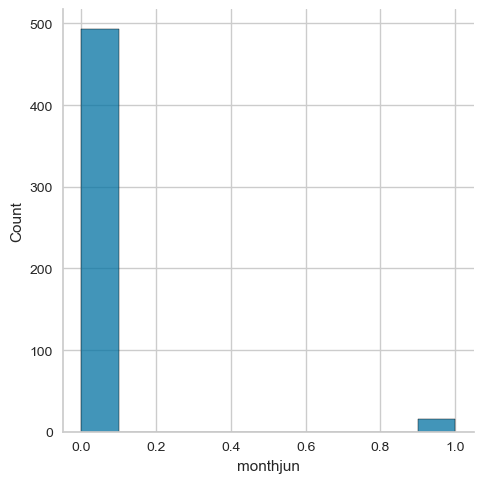

<Figure size 2000x1000 with 0 Axes>

monthmar


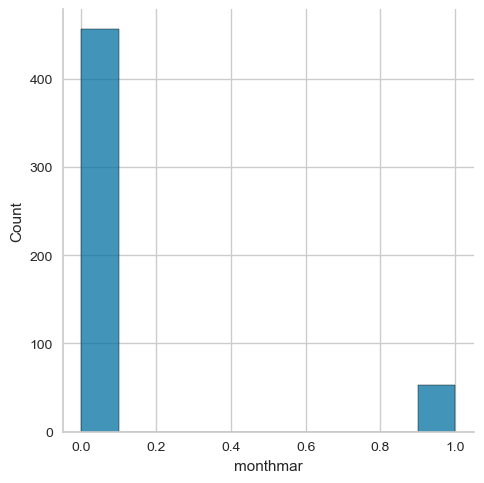

<Figure size 2000x1000 with 0 Axes>

monthmay


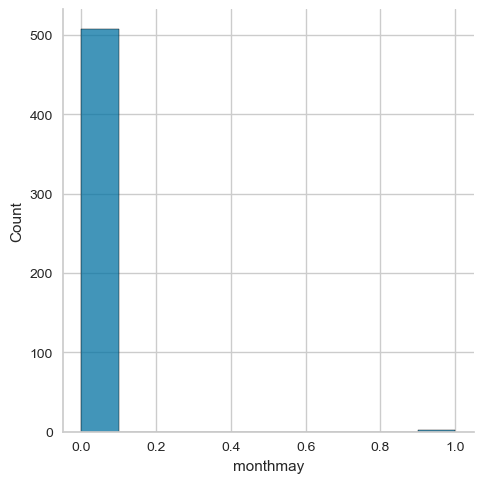

<Figure size 2000x1000 with 0 Axes>

monthnov


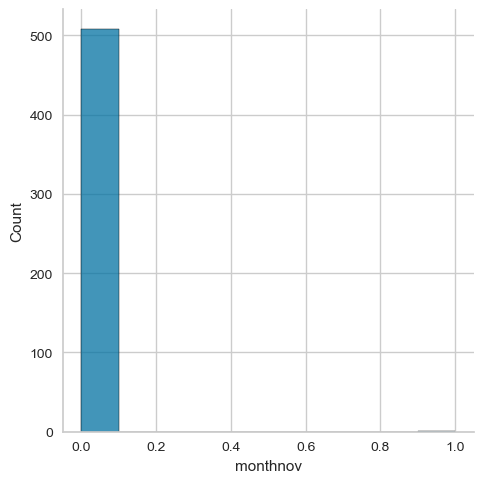

<Figure size 2000x1000 with 0 Axes>

monthoct


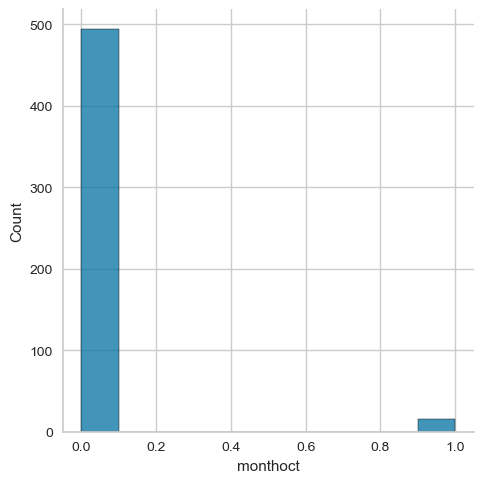

<Figure size 2000x1000 with 0 Axes>

monthsep


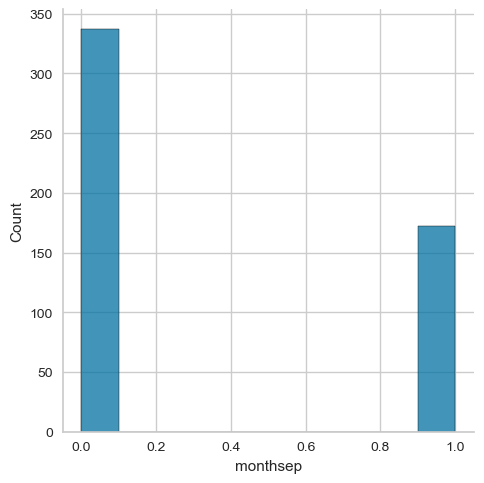

<Figure size 2000x1000 with 0 Axes>

size_category


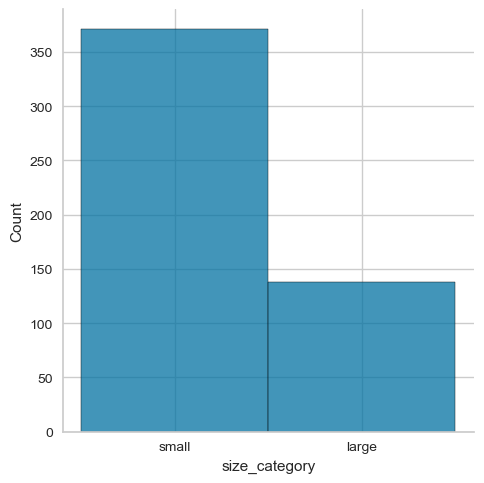

<Figure size 2000x1000 with 0 Axes>

In [14]:
#checking the skewness and analysing distribution of data
for n in df.columns:
    print(n)
    sn.displot(df[n])
    plt.figure(figsize=(20,10))
    plt.show()

In [15]:
#checking the correlation between features 
df1.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998,0.020889,...,-0.281054,-0.455128,0.033137,-0.041972,-0.074706,-0.036983,-0.088879,-0.005172,0.080444,-0.024292
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932,-0.011152,...,-0.319691,-0.106256,0.000617,-0.047759,-0.404974,-0.082312,-0.074642,-0.188126,0.119779,-0.046598
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542,-0.001642,...,-0.402201,-0.115871,-0.101518,-0.178719,-0.648890,-0.115010,-0.078927,0.094091,0.538299,-0.028372
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429,0.051599,...,-0.250494,-0.103846,0.020932,0.119765,-0.143589,-0.060655,-0.076748,-0.071401,-0.069600,0.007867
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173,-0.077766,...,-0.319901,-0.146547,0.143987,0.052779,-0.342129,-0.045372,-0.053720,-0.052918,0.091428,-0.009976
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554,0.069599,...,0.141593,0.171900,0.013808,0.014425,-0.083581,0.087384,-0.035967,-0.072335,-0.061631,0.039730
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623,0.121056,...,-0.028820,-0.070217,-0.039880,0.010124,0.181610,0.015311,0.012049,-0.053404,-0.180211,-0.059513
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511,-0.001723,...,-0.013961,-0.004336,-0.012411,-0.012437,-0.019189,-0.004336,-0.003063,-0.012030,-0.049319,-0.053463
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000,-0.052390,...,-0.021205,-0.012737,0.005566,-0.019083,-0.048394,0.006124,-0.008997,-0.017284,0.055191,-0.310561
dayfri,0.020889,-0.011152,-0.001642,0.051599,-0.077766,0.069599,0.121056,-0.001723,-0.052390,1.000000,...,0.047592,-0.027723,-0.048598,-0.018562,0.041050,0.057284,-0.019584,-0.045470,0.111903,0.017980


<AxesSubplot:>

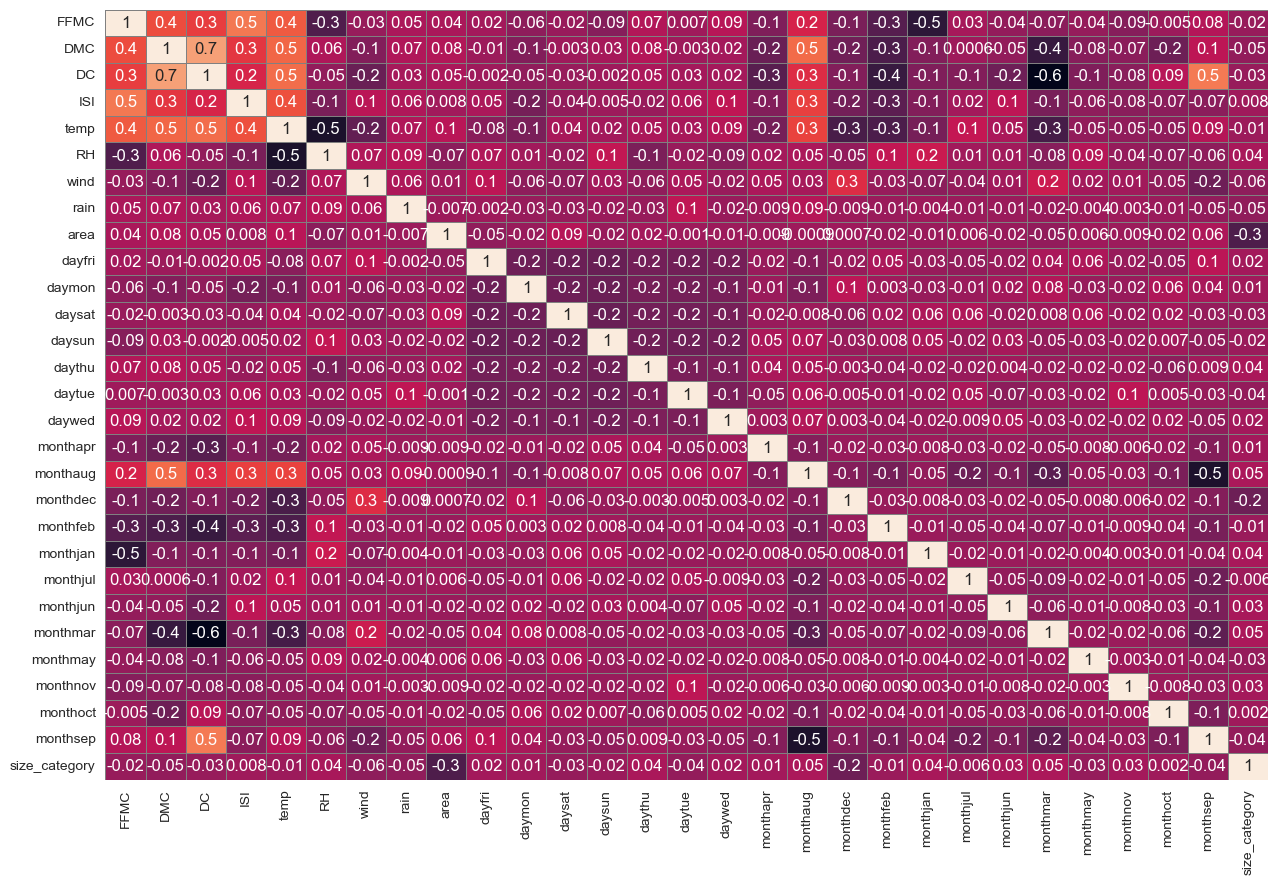

In [16]:
#*Pearson's Correlation Coefficient*: helps you find out the relationship between two quantities
fig,ax = plt.subplots(figsize = (15,10))
sn.heatmap(df1.corr(),annot=True,fmt='.1g',cbar=False,linewidths='0.5',linecolor='grey')

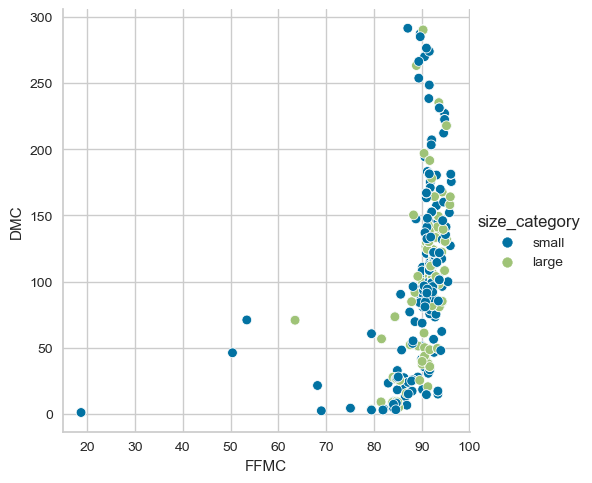

In [17]:
#plotting to know relation of FFMC and DMC
sn.relplot(data=df,x='FFMC',y='DMC',hue='size_category')


In [18]:
## we observe that rate of DMC increases at higher FFMC ratio of forest burns ##

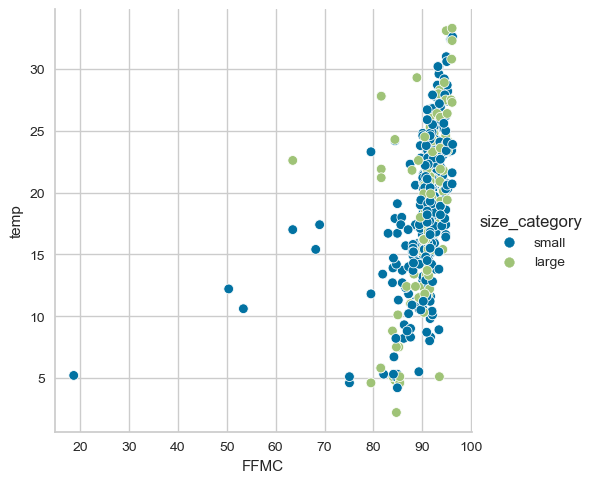

In [19]:
#plotting to know relation of FFMC and temp
sn.relplot(data=df,x='FFMC',y='temp',hue='size_category')


In [20]:
## we observe that higher FFMC ratio indicates of rise in temperatures leading to forest fires ##

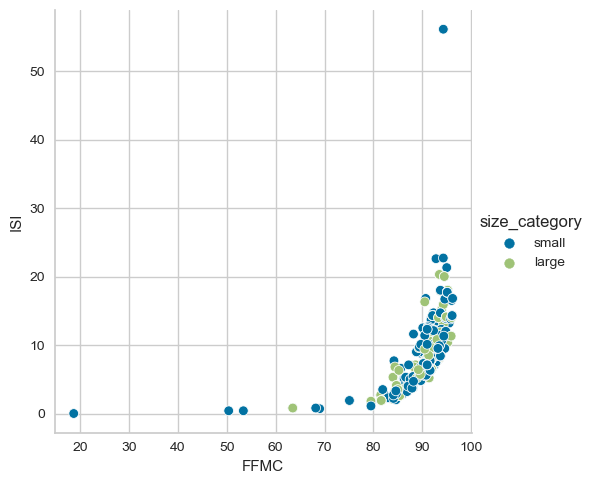

In [21]:
#plotting to know relation of FFMC and ISI
sn.relplot(data=df,x='FFMC',y='ISI',hue='size_category')


In [22]:
## we observe that lower ISI value but high FFMC values are affecting the areas ##

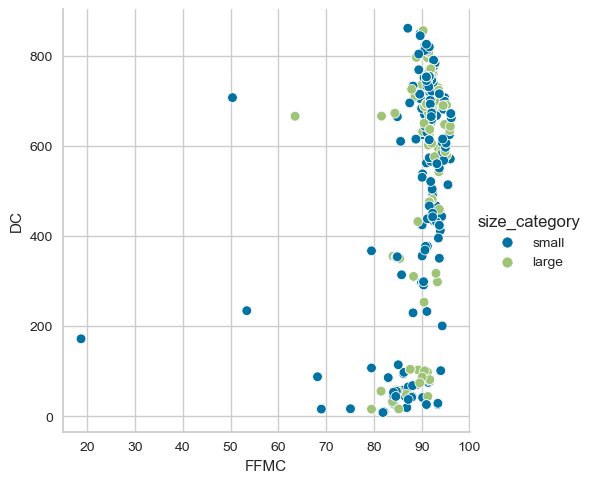

In [23]:
#plotting to know relation of FFMC and DC
sn.relplot(data=df,x='FFMC',y='DC',hue='size_category')


In [24]:
## we observe lower or higher  drought code ,the areas are still affected with forest fires ##

<AxesSubplot:>

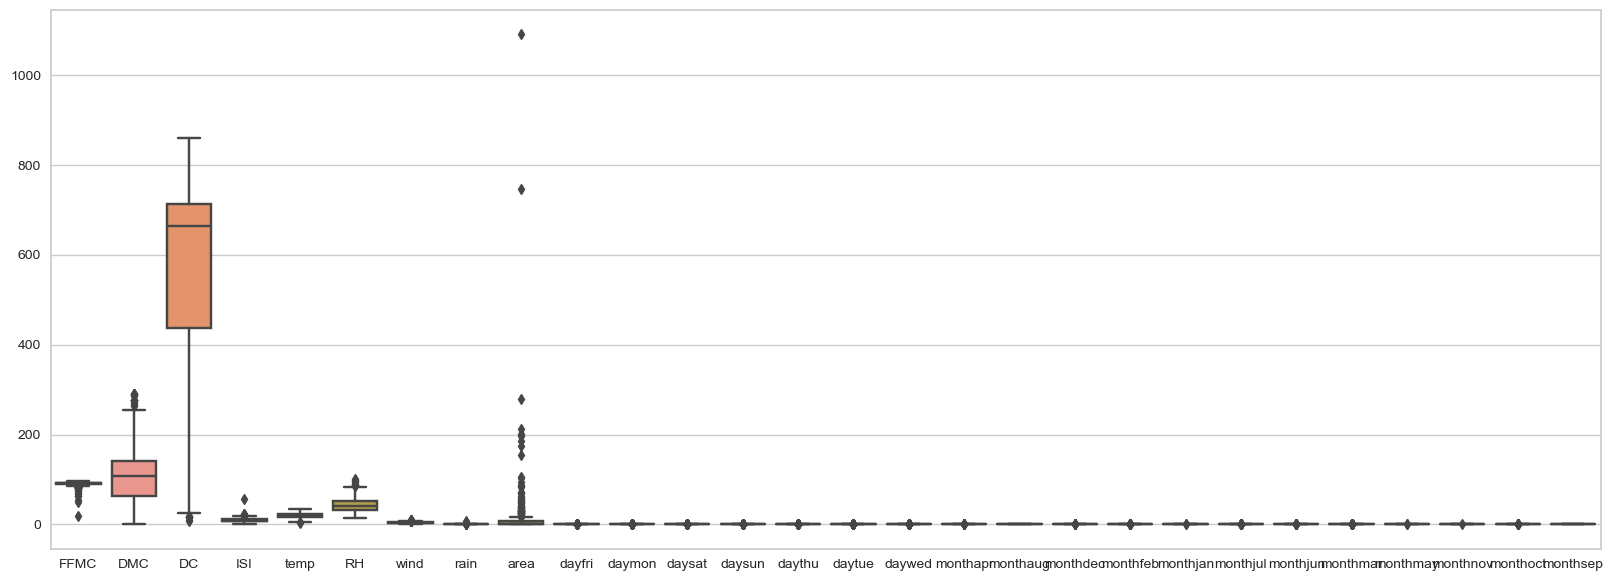

In [25]:
## after all key observations lets look for outliers ## 
plt.figure(figsize=(20,7))
sn.boxplot(data = df)


C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

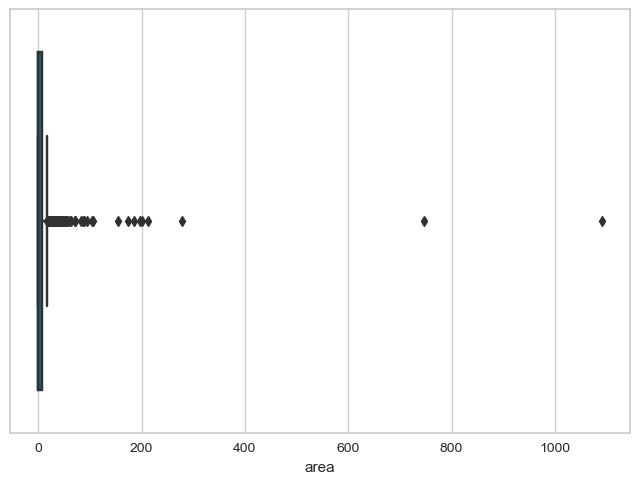

In [26]:
#checking with outlier in area
sn.boxplot(df['area'])

In [27]:
#checking with the balance of our dependent variable
df.size_category.value_counts()

small    371
large    138
Name: size_category, dtype: int64

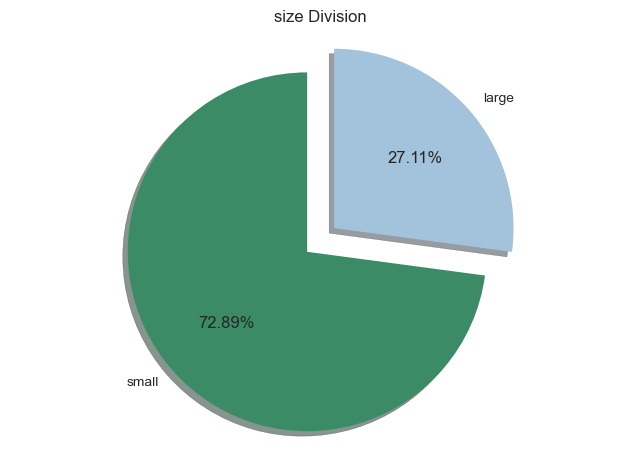

In [28]:
#checking the balance of forest fires small and large areas
labels =['small','large']
colors =['#3B8C66','#A2C3DB']
sizes = [371,138]
plt.pie(sizes,labels=labels,colors=colors,startangle=90,shadow=True,
       explode= (0.1,0.1),autopct ='%1.2f%%')
plt.title('size Division')
plt.axis('equal')
plt.show()

In [29]:
#1 = smaller regions and 0 = larger regions
df1.size_category.value_counts()

1    371
0    138
Name: size_category, dtype: int64

In [30]:
## our data is perfectly imbalanced hence we need to balance it further ##

# EDA 

In [31]:
#converting our month column from object to integer
df1['month_number'] = pd.to_datetime(df1['month'], format='%b').dt.month
df1['month_number'] = df1['month_number'].astype(int)

In [32]:
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,month_number
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,1,3
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,1,0,1,10
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,1,0,1,10
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,1,3
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,1,0,0,0,0,1,3


In [33]:
#dropping our month  categorical coloumn and day categorical coloumn 
df2 = df1.drop('month',axis = 1)

df2.head()

,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,month_number
0,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,...,0,0,0,1,0,0,0,0,1,3
1,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,...,0,0,0,0,0,0,1,0,1,10
2,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,...,0,0,0,0,0,0,1,0,1,10
3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,...,0,0,0,1,0,0,0,0,1,3
4,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,...,0,0,0,1,0,0,0,0,1,3


In [34]:
#dropping day column 
df3 = df2.drop('day',axis = 1)
df3.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,month_number
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,1,0,0,0,0,1,3
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,10
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,10
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,1,0,0,0,0,1,3
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,1,0,0,0,0,1,3


In [35]:
#rearranging the columns 
df3 = df3[[df3.columns[-1]] + list(df3.columns[:-1])]
df3 = df3[['month_number'] + [col for col in df3.columns if col != 'month_number']]

df3.head()


,month_number,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,3,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
3,3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,...,0,0,0,0,1,0,0,0,0,1
4,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1


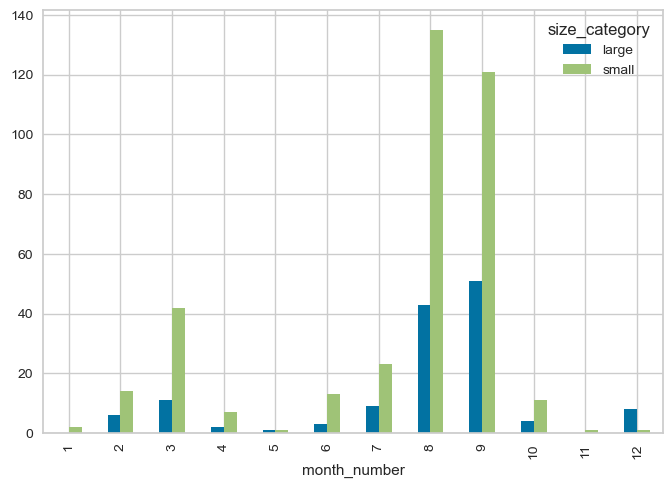

In [36]:
#plotting month against forest regions burns to know which season affects more 
pd.crosstab(df3.month_number,df.size_category).plot(kind='bar')
plt.show()

In [37]:
## according to the plot we see impact of smaller region of forest is more than larger areas ##
## we also observe that month of september and october forest fires are at peak regardless scale of area ##

C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

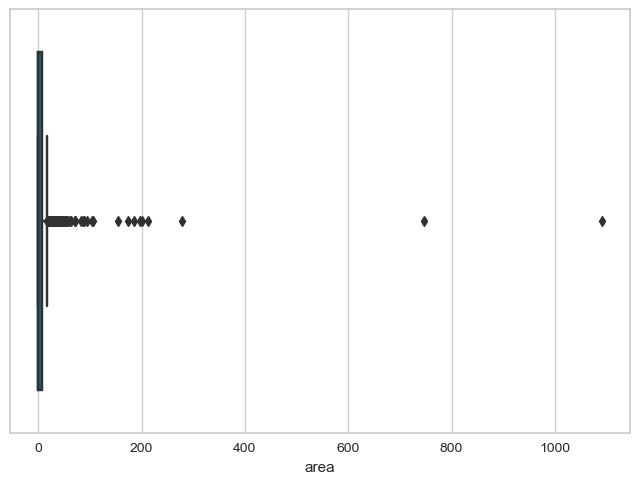

In [38]:
#outlier analysis and treatment
sn.boxplot(df['area'])

In [39]:
#finding our upper and lower limit in area
ul = df3['area'].quantile(0.99)
ll = df3['area'].quantile(0.01)

print(ul,ll)

195.62240000000017 0.0


In [40]:
#trimming the outliers 
df4 = df3[(df3['area']<=194.83)&(df3['area']>0)]

C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

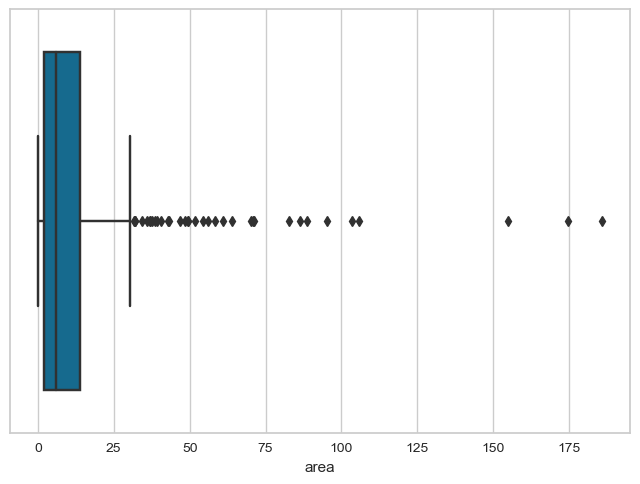

In [41]:
#plotting after trimming outliers
sn.boxplot(df4['area'])

In [42]:
df4['area'] = np.where(df4['area']>=ul,
                      ul,
                      np.where(df4['area']<=ll,
                              ll,
                              df4['area']))

C:\Users\SP\AppData\Local\Temp\ipykernel_75148\1513294397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['area'] = np.where(df4['area']>=ul,


C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

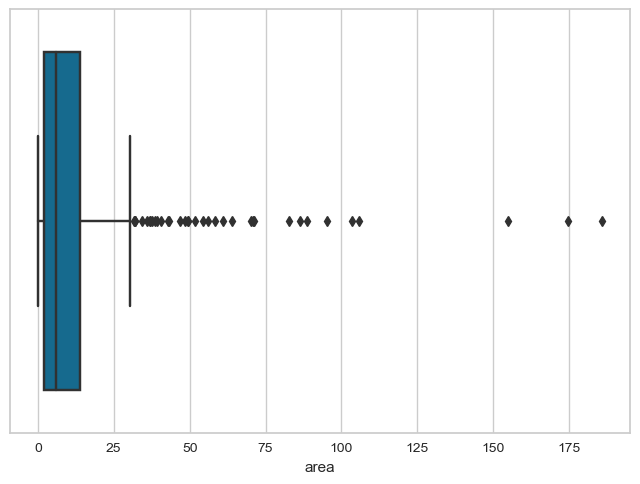

In [43]:
sn.boxplot(df4['area'])

month_number


C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


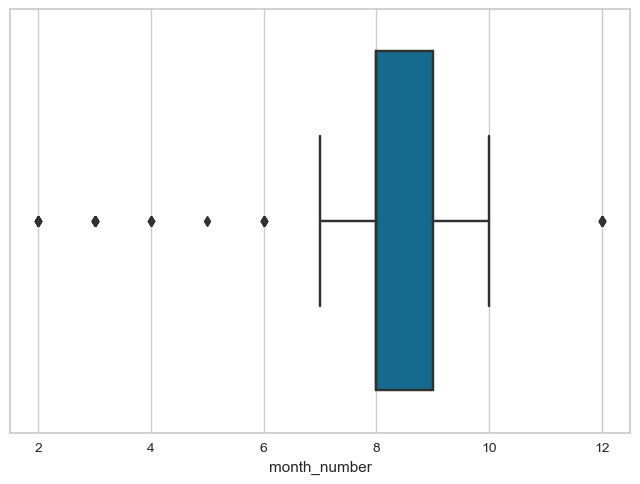

FFMC


C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


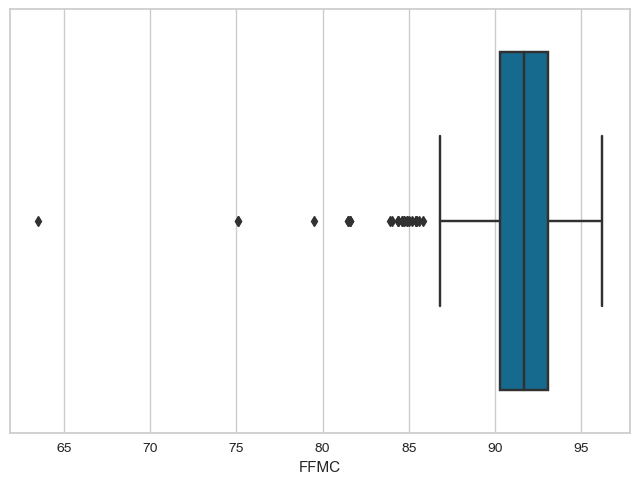

DMC


C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


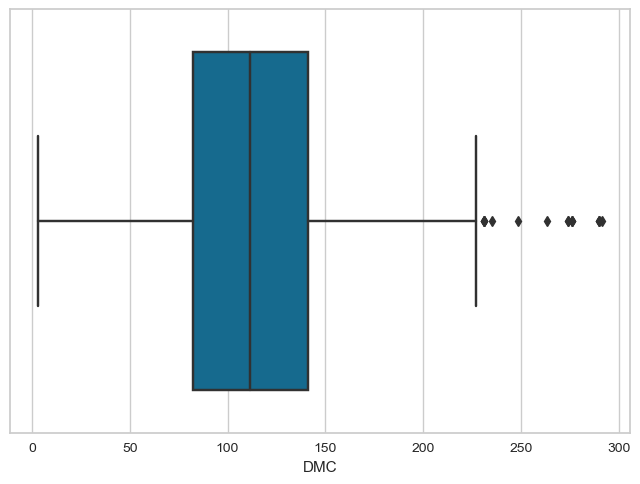

DC


C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


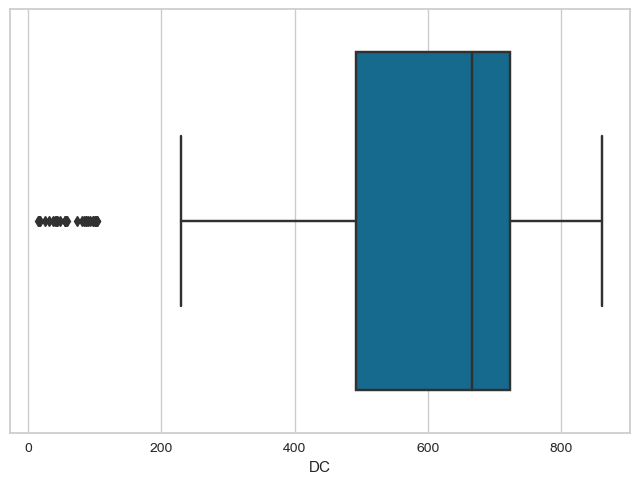

ISI


C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


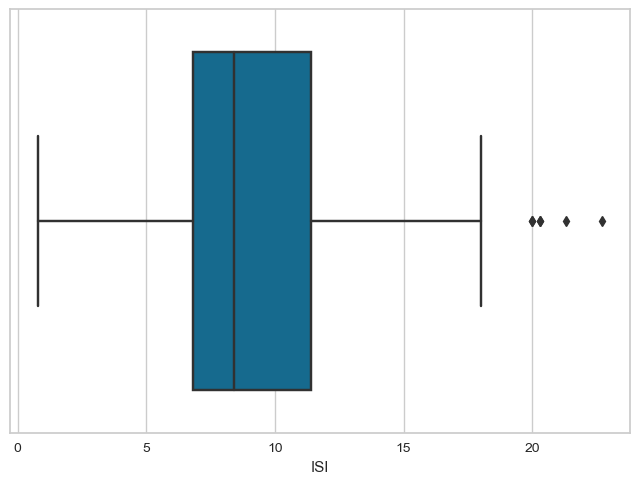

C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


temp


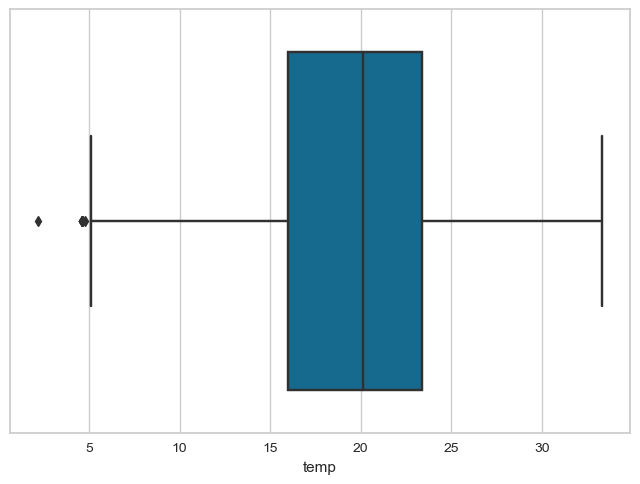

C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


RH


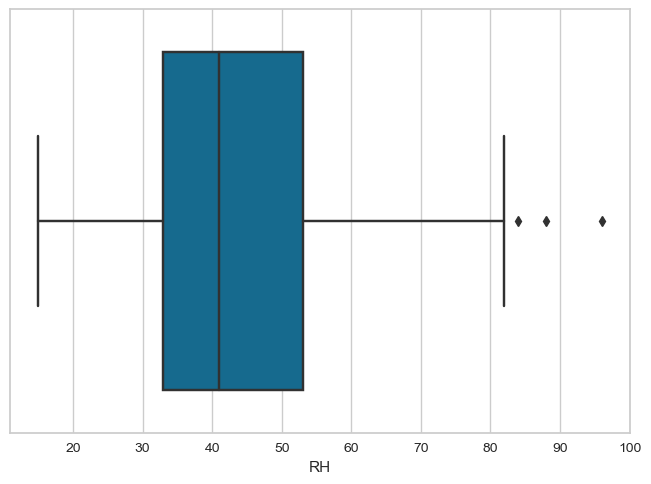

C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


wind


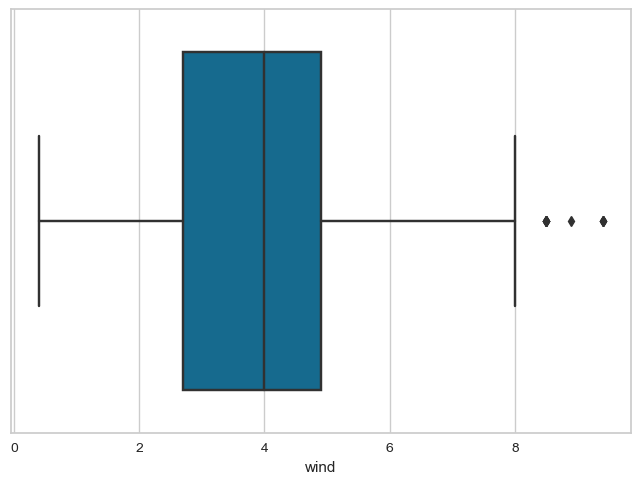

rain


C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


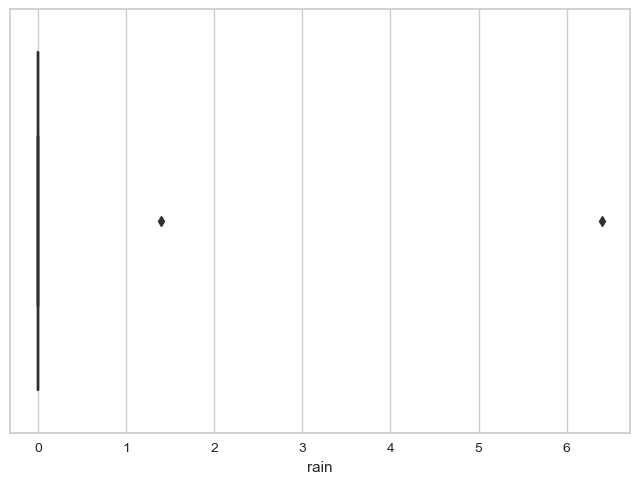

area


C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


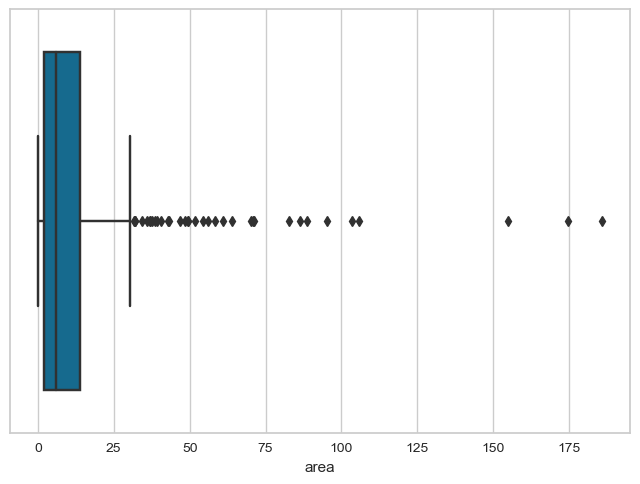

C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


dayfri


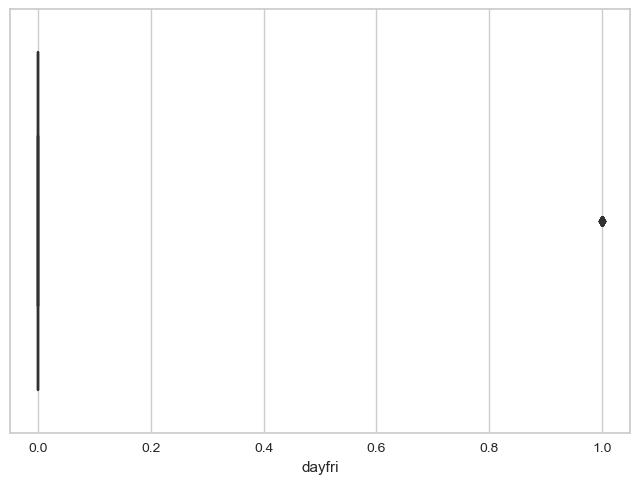

C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


daymon


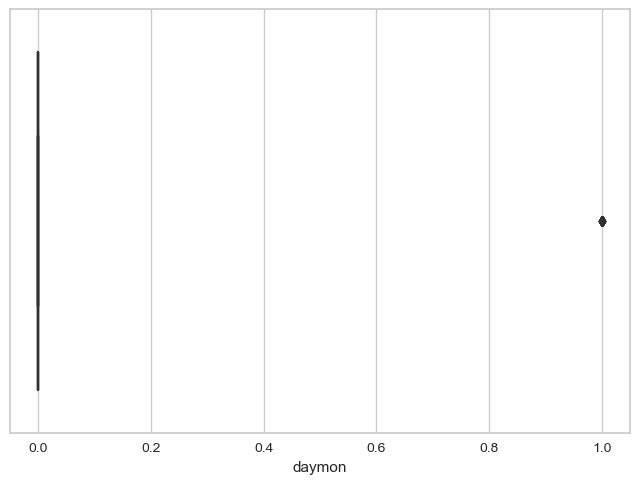

daysat


C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


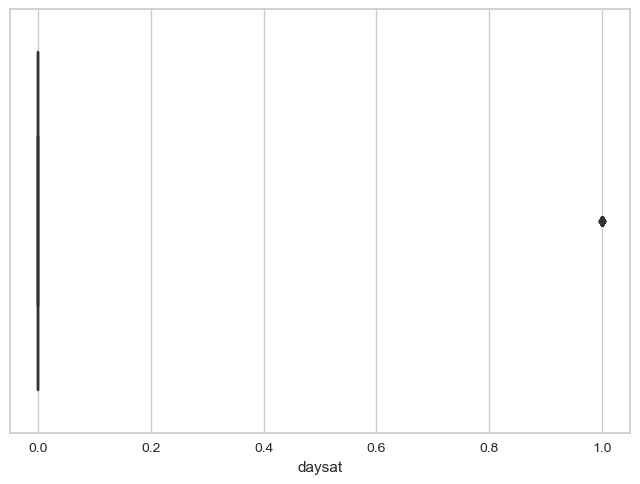

C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


daysun


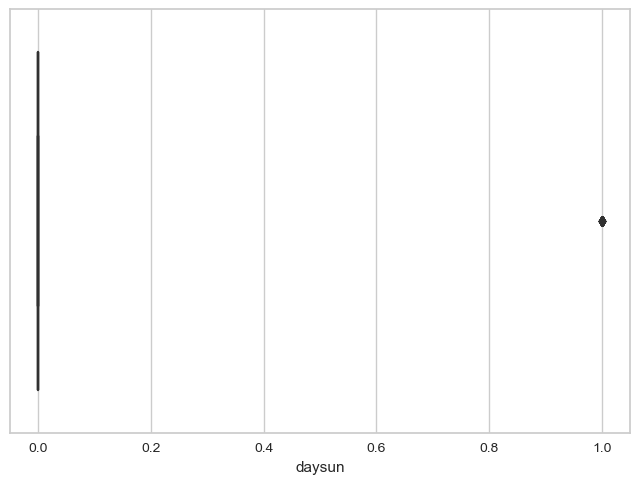

C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


daythu


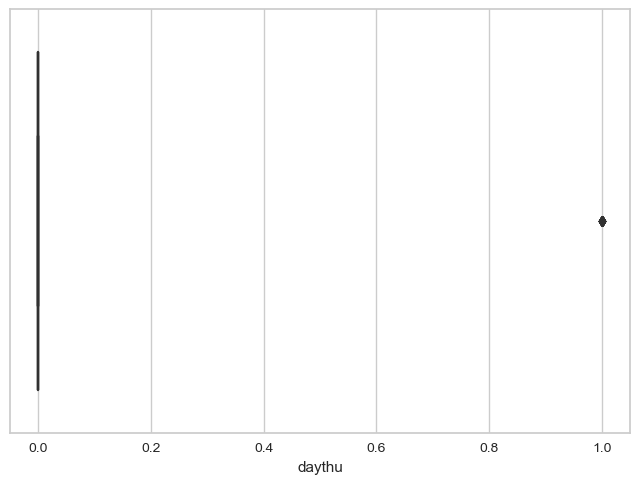

C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


daytue


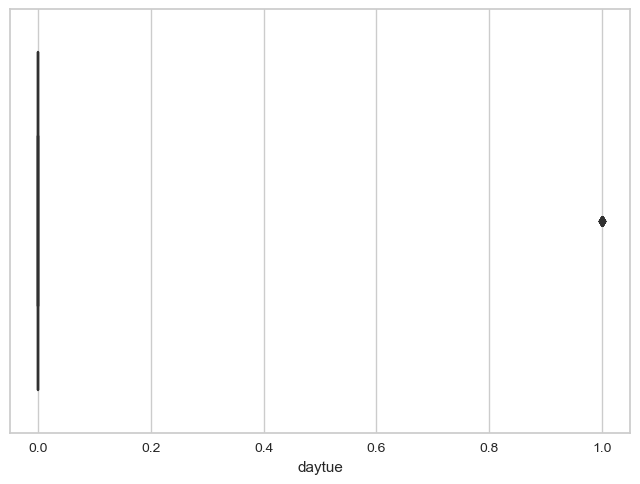

C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


daywed


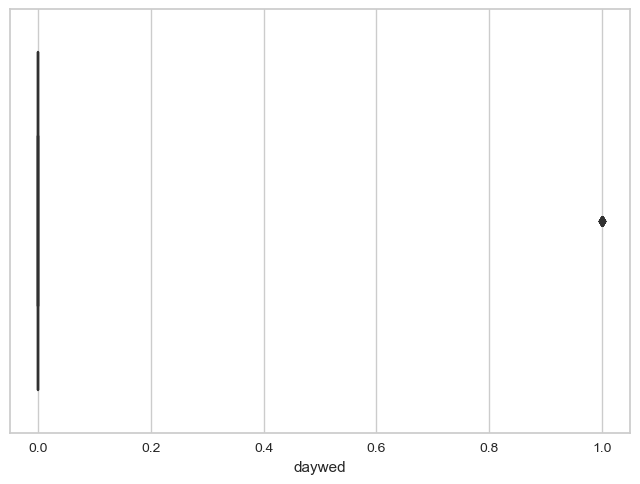

C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


monthapr


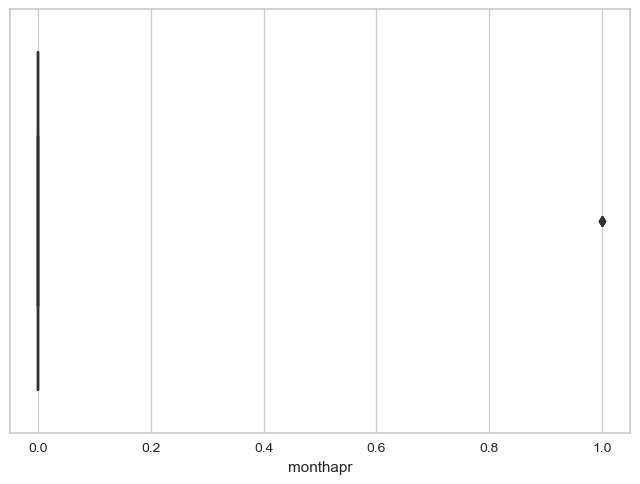

C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


monthaug


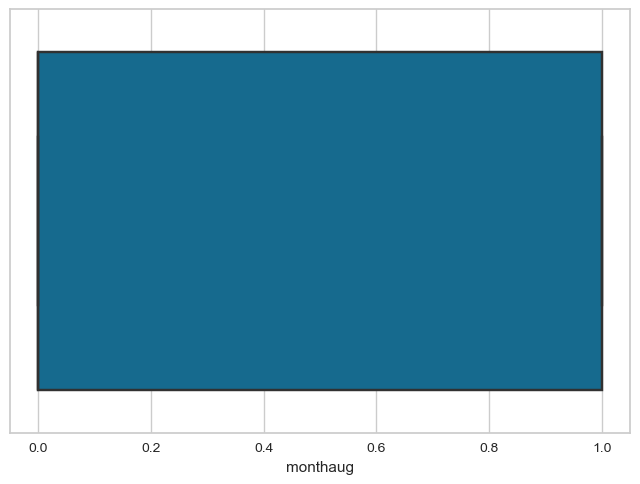

C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


monthdec


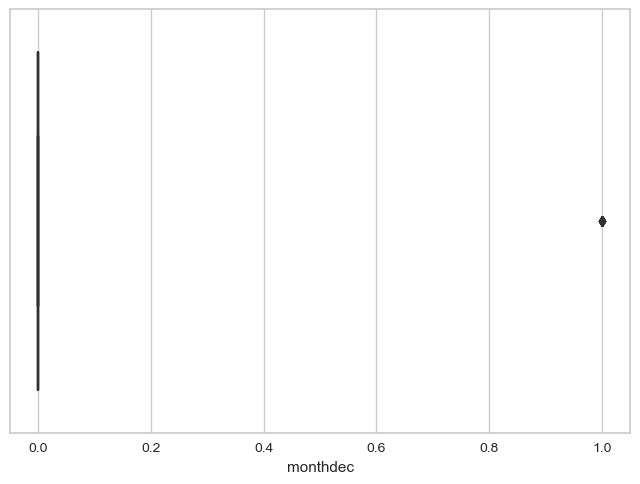

monthfeb


C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


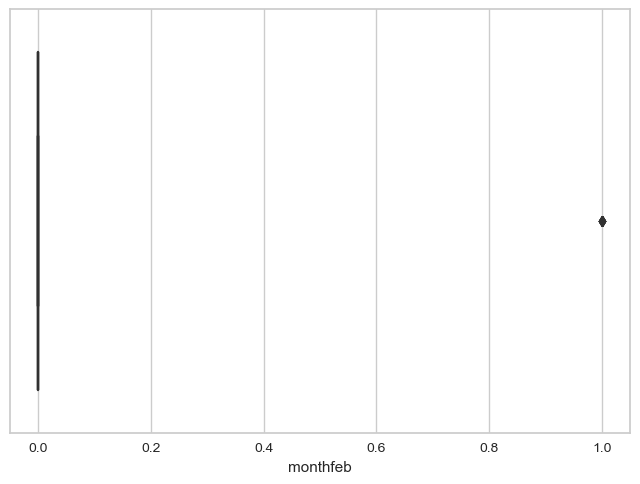

C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


monthjan


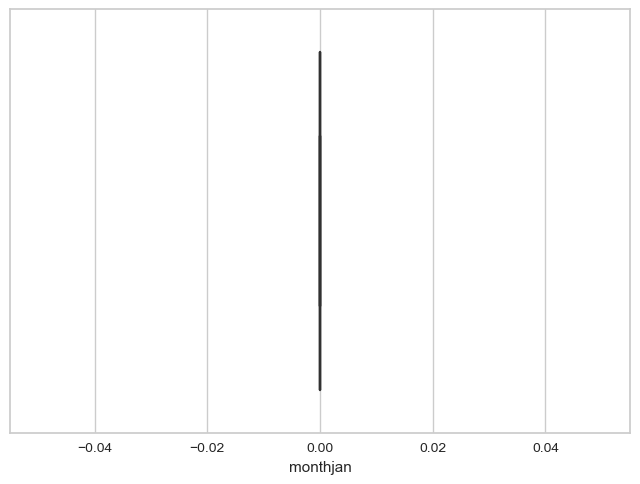

C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


monthjul


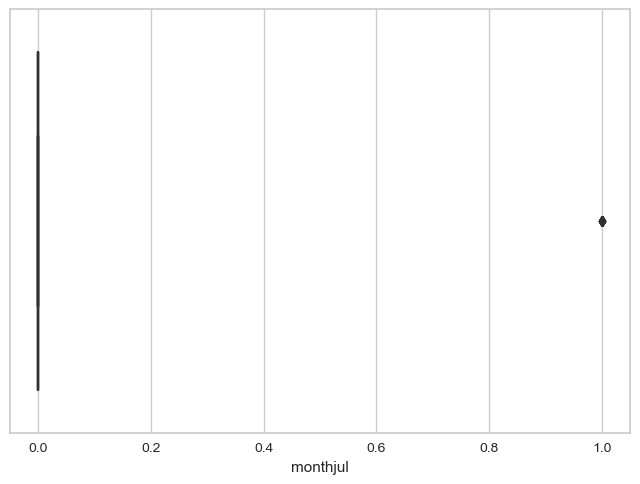

monthjun


C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


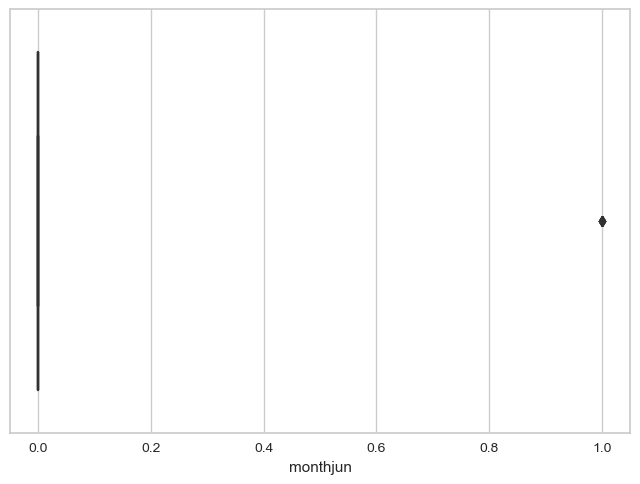

C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


monthmar


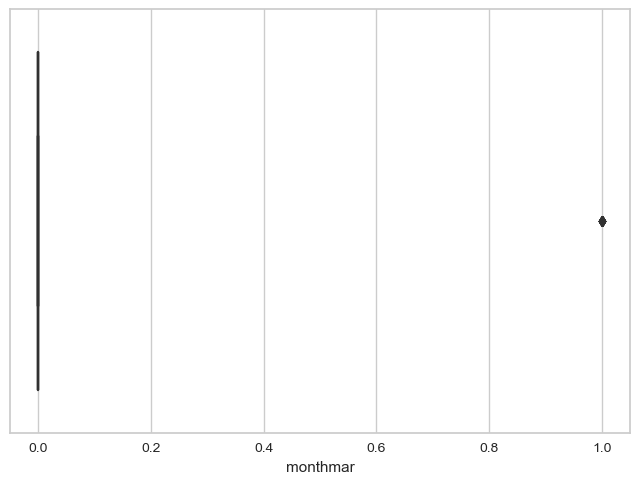

monthmay


C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


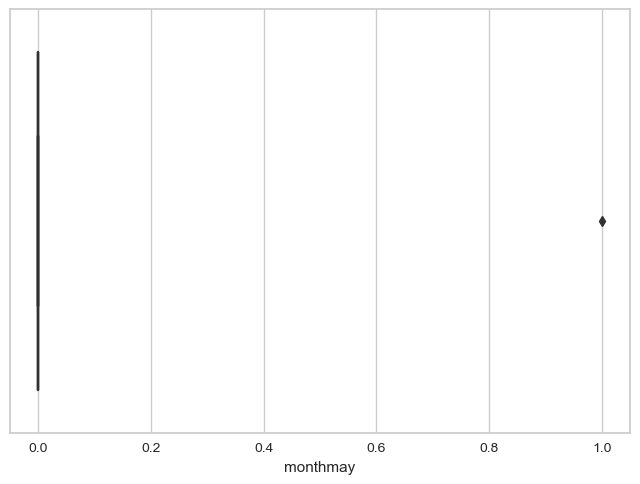

monthnov


C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


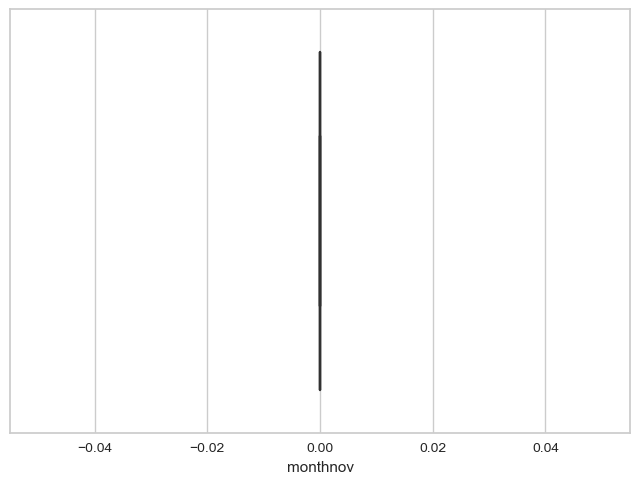

monthoct


C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


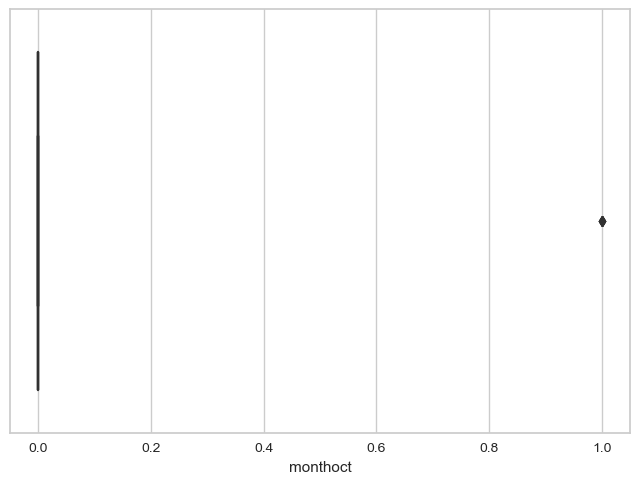

monthsep


C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


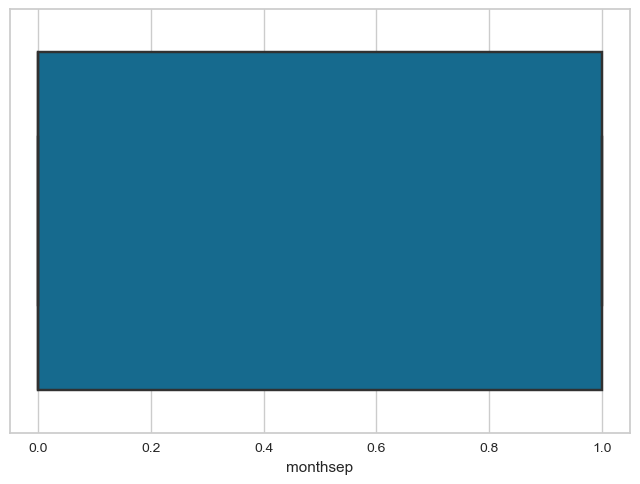

size_category


C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


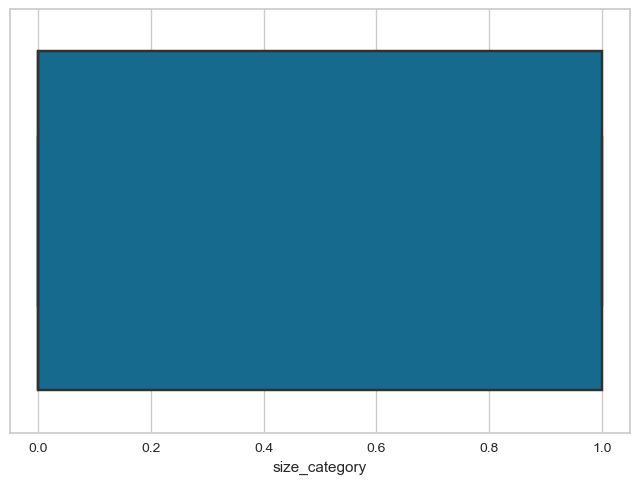

In [44]:
#checking for outlier using boxplot 
for n in df4.columns:
    print(n)
    sn.boxplot(df4[n])
    plt.show()

<AxesSubplot:>

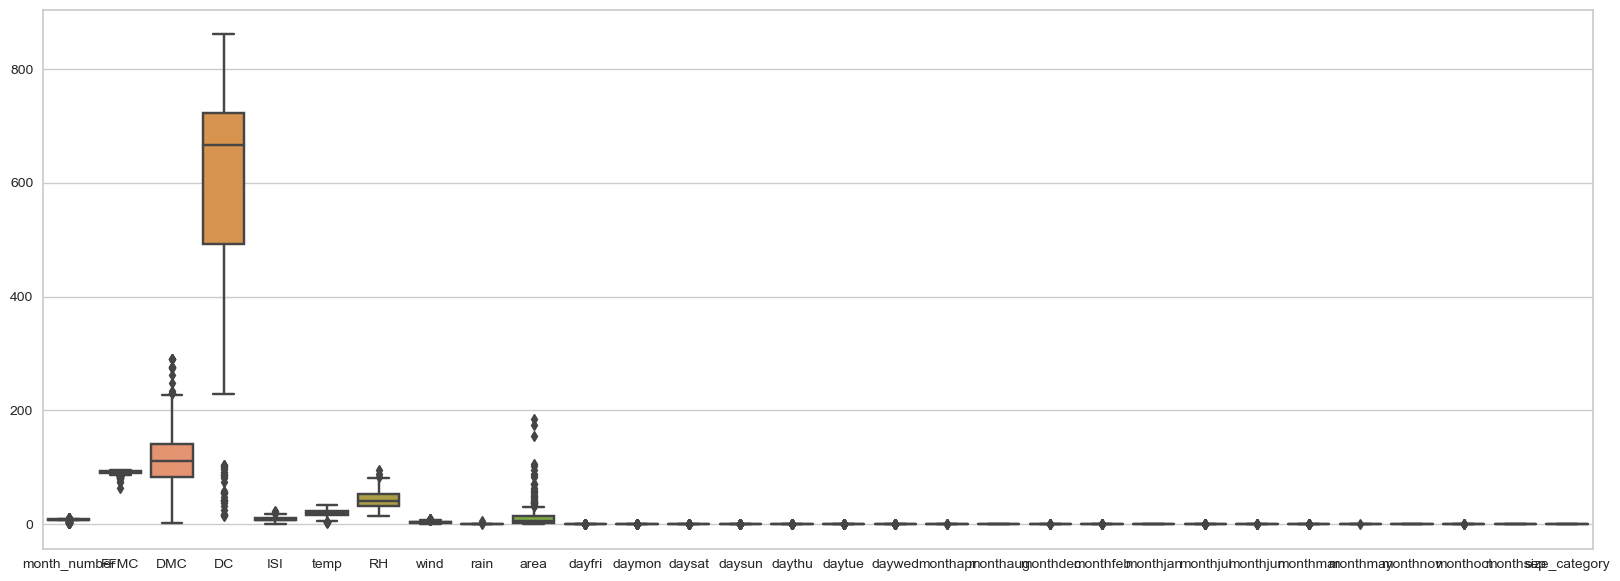

In [45]:
## after all key observations lets look for distance of outliers ## 
plt.figure(figsize=(20,7))
sn.boxplot(data = df4)


In [46]:
## since we have the minimal distance between outliers we stop our diagnostics here ##

# Feature engineering

In [47]:
#standardizing our data for improved run complexity
df4.shape

(263, 30)

In [48]:
#reseting our index 
df4.reset_index(drop=True)


,month_number,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,...,0,0,1,0,0,0,0,0,0,1
1,9,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,...,0,0,0,0,0,0,0,0,1,1
2,9,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,...,0,0,0,0,0,0,0,0,1,1
3,8,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,...,0,0,0,0,0,0,0,0,0,1
4,8,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,8,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,...,0,0,0,0,0,0,0,0,0,1
259,8,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,...,0,0,0,0,0,0,0,0,0,1
260,8,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,...,0,0,0,0,0,0,0,0,0,0
261,8,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#splitting our data into dependent and independent 
X = df4.iloc[:,0:29]
y = df4.iloc[:,29]

In [50]:
#standardizing our training data
std = StandardScaler()
df_scaled = std.fit_transform(X)
df_scaled

array([[-0.36151664, -1.39365957, -1.06822613, ...,  0.        ,
        -0.13921151, -0.7457969 ],
       [ 0.58454183, -0.00315193,  0.24344647, ...,  0.        ,
        -0.13921151,  1.34084762],
       [ 0.58454183, -0.02989246,  0.19498566, ...,  0.        ,
        -0.13921151,  1.34084762],
       ...,
       [ 0.11151259, -2.51676189, -0.93253586, ...,  0.        ,
        -0.13921151, -0.7457969 ],
       [ 0.11151259, -2.51676189, -0.93253586, ...,  0.        ,
        -0.13921151, -0.7457969 ],
       [ 0.11151259, -2.51676189, -0.93253586, ...,  0.        ,
        -0.13921151, -0.7457969 ]])

In [51]:
#fitting our X values 
X = df_scaled

In [52]:
#splitting into train and test split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

# Recursive Elimination Method 

In [53]:
svc_lin = SVC(kernel='linear')
svm_rfe_model = RFE(estimator=svc_lin)
svm_rfe_model_fit = svm_rfe_model.fit(X_train,y_train)

In [54]:
svm_rfe_model_fit.n_features_

14

In [55]:
svm_rfe_model_fit.ranking_

array([ 1,  1,  1,  6,  1, 11,  5,  1, 12,  1,  2, 10,  4,  3,  1,  1,  1,
        1,  1,  1,  1, 16,  9,  8,  7, 13, 15, 14,  1])

In [56]:
svm_rfe_model_fit.support_

array([ True,  True,  True, False,  True, False, False,  True, False,
        True, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False,  True])

In [57]:
#plotting by rfecv curve for accuracy
X,y = make_classification(n_samples=200,n_features=30,n_informative=14,n_redundant=2,
                          n_repeated=0,n_classes=2,n_clusters_per_class=1,random_state=0 )

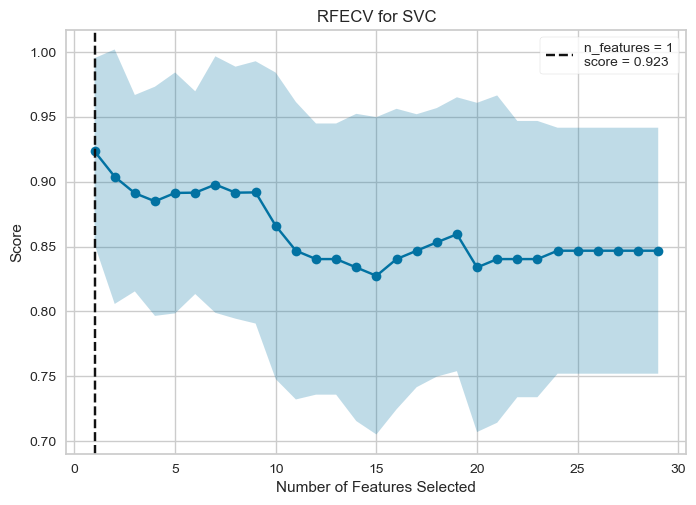

<AxesSubplot:title={'center':'RFECV for SVC'}, xlabel='Number of Features Selected', ylabel='Score'>

In [58]:
visualizer = RFECV(SVC(kernel='linear',C=1))
visualizer.fit(X_train,y_train)
visualizer.show()

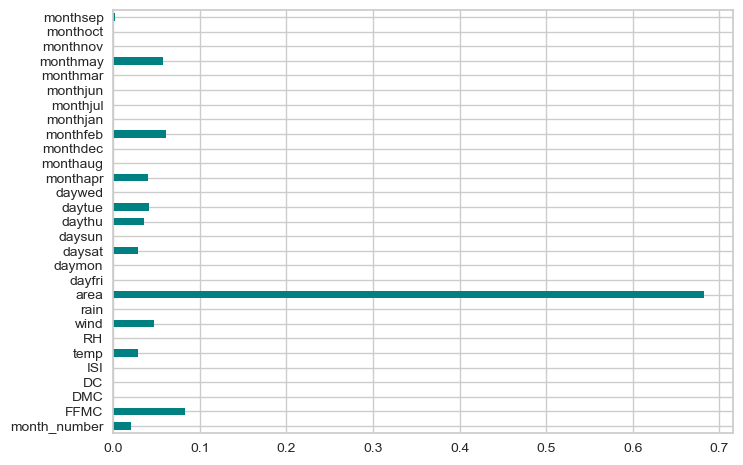

In [59]:
#checking through importance plot for selection of coloumns
importances = mutual_info_classif(X_train,y_train)
feat_importances = pd.Series(importances,df4.columns[0:len(df4.columns)-1])
feat_importances.plot(kind = 'barh',color ='teal')
plt.show()

In [60]:
#checking for columns required 
for i,col in zip(range(X_train.shape[1]),X_train):
    print(f"{col} selected = {svm_rfe_model_fit.support_[i]} rank = {svm_rfe_model_fit.ranking_[i]}")

[-2.72666281 -3.07831306 -1.7902922  -2.41769259 -1.76753251 -2.35937313
  0.99937106 -1.69858157 -0.073614   -0.31311071 -0.44210242 -0.41096093
  2.39657876 -0.46041456 -0.35882498 -0.39180195 -0.37219368 -0.12427395
 -0.76441962 -0.18823674  5.02991054  0.         -0.26287961 -0.17712298
 -0.27105237 -0.06178021  0.         -0.13921151 -0.7457969 ] selected = True rank = 1
[ 0.58454183 -0.00315193  0.24344647  0.52688515 -0.52247587  0.39282088
 -0.38953844 -1.01155325 -0.073614   -0.56585017 -0.44210242 -0.41096093
 -0.41726148 -0.46041456 -0.35882498  2.55230988 -0.37219368 -0.12427395
 -0.76441962 -0.18823674 -0.19881069  0.         -0.26287961 -0.17712298
 -0.27105237 -0.06178021  0.         -0.13921151  1.34084762] selected = True rank = 1
[ 0.11151259  0.29099392 -0.05216447  0.35950549  0.10005245 -0.42800891
  0.20570849 -1.69858157 -0.073614   -0.49251235 -0.44210242 -0.41096093
 -0.41726148 -0.46041456 -0.35882498 -0.39180195  2.68677316 -0.12427395
  1.30818202 -0.1882367

In [61]:
#we select our best 14 coloumns as as 2 features lot of variance leading to overfitting
df5 = df4[['month_number','FFMC','DMC','DC','ISI','RH','wind','area','daysat','daythu',
          'daywed','monthaug','monthdec','monthoct','size_category']]

In [62]:
svm_rfe_model.support_

array([ True,  True,  True, False,  True, False, False,  True, False,
        True, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False,  True])

In [63]:
#checking our new shape of data
df5.shape

(263, 15)

In [64]:
df5.head()

,month_number,FFMC,DMC,DC,ISI,RH,wind,area,daysat,daythu,daywed,monthaug,monthdec,monthoct,size_category
138,7,85.8,48.3,313.4,3.9,42,2.7,0.36,0,0,0,0,0,0,1
139,9,91.0,129.5,692.6,7.0,38,2.2,0.43,0,0,0,0,0,0,1
140,9,90.9,126.5,686.5,7.0,39,1.8,0.47,0,0,0,0,0,0,1
141,8,95.5,99.9,513.3,13.2,31,4.5,0.55,0,0,1,1,0,0,1
142,8,90.1,108.0,529.8,12.5,51,8.9,0.61,0,0,0,1,0,0,1


In [65]:
## since we have month number we can further reduce our dimension by droping days category and month category ##
df6 = df5.drop(['daysat','daythu','daywed','monthaug','monthdec','monthoct'],axis = 1)

In [66]:
df6.head()

,month_number,FFMC,DMC,DC,ISI,RH,wind,area,size_category
138,7,85.8,48.3,313.4,3.9,42,2.7,0.36,1
139,9,91.0,129.5,692.6,7.0,38,2.2,0.43,1
140,9,90.9,126.5,686.5,7.0,39,1.8,0.47,1
141,8,95.5,99.9,513.3,13.2,31,4.5,0.55,1
142,8,90.1,108.0,529.8,12.5,51,8.9,0.61,1


In [67]:
df6 = df6.reset_index(drop=True)

In [68]:
df6.head()

,month_number,FFMC,DMC,DC,ISI,RH,wind,area,size_category
0,7,85.8,48.3,313.4,3.9,42,2.7,0.36,1
1,9,91.0,129.5,692.6,7.0,38,2.2,0.43,1
2,9,90.9,126.5,686.5,7.0,39,1.8,0.47,1
3,8,95.5,99.9,513.3,13.2,31,4.5,0.55,1
4,8,90.1,108.0,529.8,12.5,51,8.9,0.61,1


In [69]:
#checking the shape of our new data 
df6.shape

(263, 9)

C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_category', ylabel='count'>

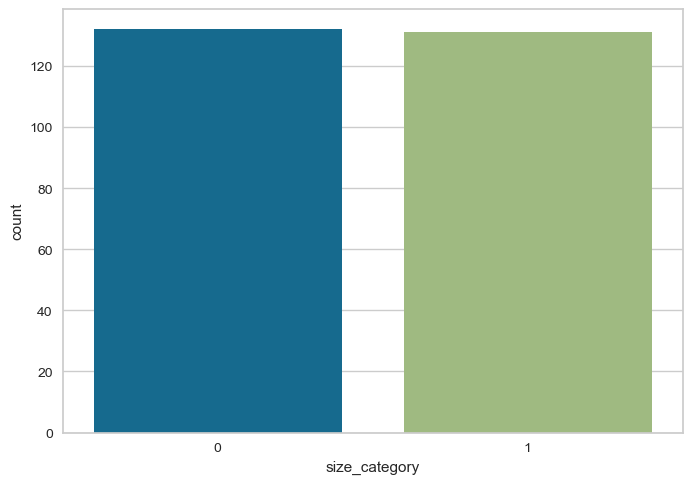

In [70]:
#checking the balance of our dependent variable 
sn.countplot(df6['size_category'])

In [71]:
df6['size_category'].value_counts()

0    132
1    131
Name: size_category, dtype: int64

In [72]:
## after performing eda and feature selection our dependent variable has good balance, hence there is no need of smote ##

# using Randomized Search cv for svm parameters

In [73]:
#splitting our data into X and y 
X2 = df6.iloc[:,0:8]
y2 = df6.iloc[:,8]

In [74]:
#standardizing values 
std2 = StandardScaler()
df_scaled2 = std2.fit_transform(X2)
df_scaled2


array([[-0.36151664, -1.39365957, -1.06822613, ..., -0.12498425,
        -0.74731159, -0.56861019],
       [ 0.58454183, -0.00315193,  0.24344647, ..., -0.38953844,
        -1.01155325, -0.56585017],
       [ 0.58454183, -0.02989246,  0.19498566, ..., -0.3233999 ,
        -1.22294658, -0.56427301],
       ...,
       [ 0.11151259, -2.51676189, -0.93253586, ..., -0.78636973,
        -0.74731159, -0.32888228],
       [ 0.11151259, -2.51676189, -0.93253586, ...,  1.79303364,
         0.89098671,  1.55779217],
       [ 0.11151259, -2.51676189, -0.93253586, ...,  1.72689509,
         1.3666217 , -0.14277771]])

In [75]:
#storing x values 
X2 = df_scaled2

In [76]:
#splitting into train and test 
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.4)

In [77]:
#checking our balance of data after train test split
print('Training Features Shape:', X2_train.shape)
print('Training Labels Shape:', X2_test.shape)
print('Testing Features Shape:', y2_train.shape)
print('Testing Labels Shape:', y2_test.shape)

Training Features Shape: (157, 8)
Training Labels Shape: (106, 8)
Testing Features Shape: (157,)
Testing Labels Shape: (106,)


In [78]:
#fitting our svc for hyperparameter tuning
clf = SVC()

In [79]:
param_grid = [{'kernel':['linear','rbf'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001] }]

In [80]:
rsv = RandomizedSearchCV(clf,param_grid,cv=10,verbose=100,n_jobs=1)

In [81]:
rsv.fit(X2_train,y2_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START C=0.001, gamma=0.5, kernel=rbf............................
[CV 1/10; 1/10] END C=0.001, gamma=0.5, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/10; 1/10] START C=0.001, gamma=0.5, kernel=rbf............................
[CV 2/10; 1/10] END C=0.001, gamma=0.5, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/10; 1/10] START C=0.001, gamma=0.5, kernel=rbf............................
[CV 3/10; 1/10] END C=0.001, gamma=0.5, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/10; 1/10] START C=0.001, gamma=0.5, kernel=rbf............................
[CV 4/10; 1/10] END C=0.001, gamma=0.5, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/10; 1/10] START C=0.001, gamma=0.5, kernel=rbf............................
[CV 5/10; 1/10] END C=0.001, gamma=0.5, kernel=rbf;, score=0.500 total time=   0.0s
[CV 6/10; 1/10] START C=0.001, gamma=0.5, kernel=rbf............................
[CV 6/10; 1/10] END C=0.001, ga

[CV 8/10; 7/10] END C=0.001, gamma=0.01, kernel=linear;, score=0.533 total time=   0.0s
[CV 9/10; 7/10] START C=0.001, gamma=0.01, kernel=linear........................
[CV 9/10; 7/10] END C=0.001, gamma=0.01, kernel=linear;, score=0.533 total time=   0.0s
[CV 10/10; 7/10] START C=0.001, gamma=0.01, kernel=linear.......................
[CV 10/10; 7/10] END C=0.001, gamma=0.01, kernel=linear;, score=0.533 total time=   0.0s
[CV 1/10; 8/10] START C=0.001, gamma=0.01, kernel=rbf...........................
[CV 1/10; 8/10] END C=0.001, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/10; 8/10] START C=0.001, gamma=0.01, kernel=rbf...........................
[CV 2/10; 8/10] END C=0.001, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/10; 8/10] START C=0.001, gamma=0.01, kernel=rbf...........................
[CV 3/10; 8/10] END C=0.001, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/10; 8/10] START C=0.001, gamma=0.01, kernel=rbf......................

RandomizedSearchCV(cv=10, estimator=SVC(), n_jobs=1,
                   param_distributions=[{'C': [10, 0.1, 0.001],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf']}],
                   verbose=100)

In [82]:
#locating our best parameters and best score for svm 
rsv.best_params_,rsv.best_score_

({'kernel': 'linear', 'gamma': 0.01, 'C': 10}, 0.9875)

# fitting our final SVM classifier model 

In [83]:
clf2 = SVC(kernel='linear',C=10,gamma=0.1)
clf2.fit(X2_train,y2_train)

SVC(C=10, gamma=0.1, kernel='linear')

In [84]:
y_pred = clf2.predict(X2_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [85]:
#confusion matrix 
print(confusion_matrix(y2_test,y_pred))

[[52  3]
 [ 3 48]]


In [86]:
#classification report 
print(classification_report(y2_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        55
           1       0.94      0.94      0.94        51

    accuracy                           0.94       106
   macro avg       0.94      0.94      0.94       106
weighted avg       0.94      0.94      0.94       106



# Conclusions 

# 1) svm are sensitive to outliers and eda plays an important role in identifying the outliers 

# 2) svm are slow towards larger volume datasets therefore dimension reduction is compulsory by feature engineering methods 

# 3) time complexity increases if dataset are not scaled or standardized and may affect run comlexity 

# 4) svms can sometime overfit the model and affect accuracy, so hyperparameter tuning plays an important role for low bias and low variance
